In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings


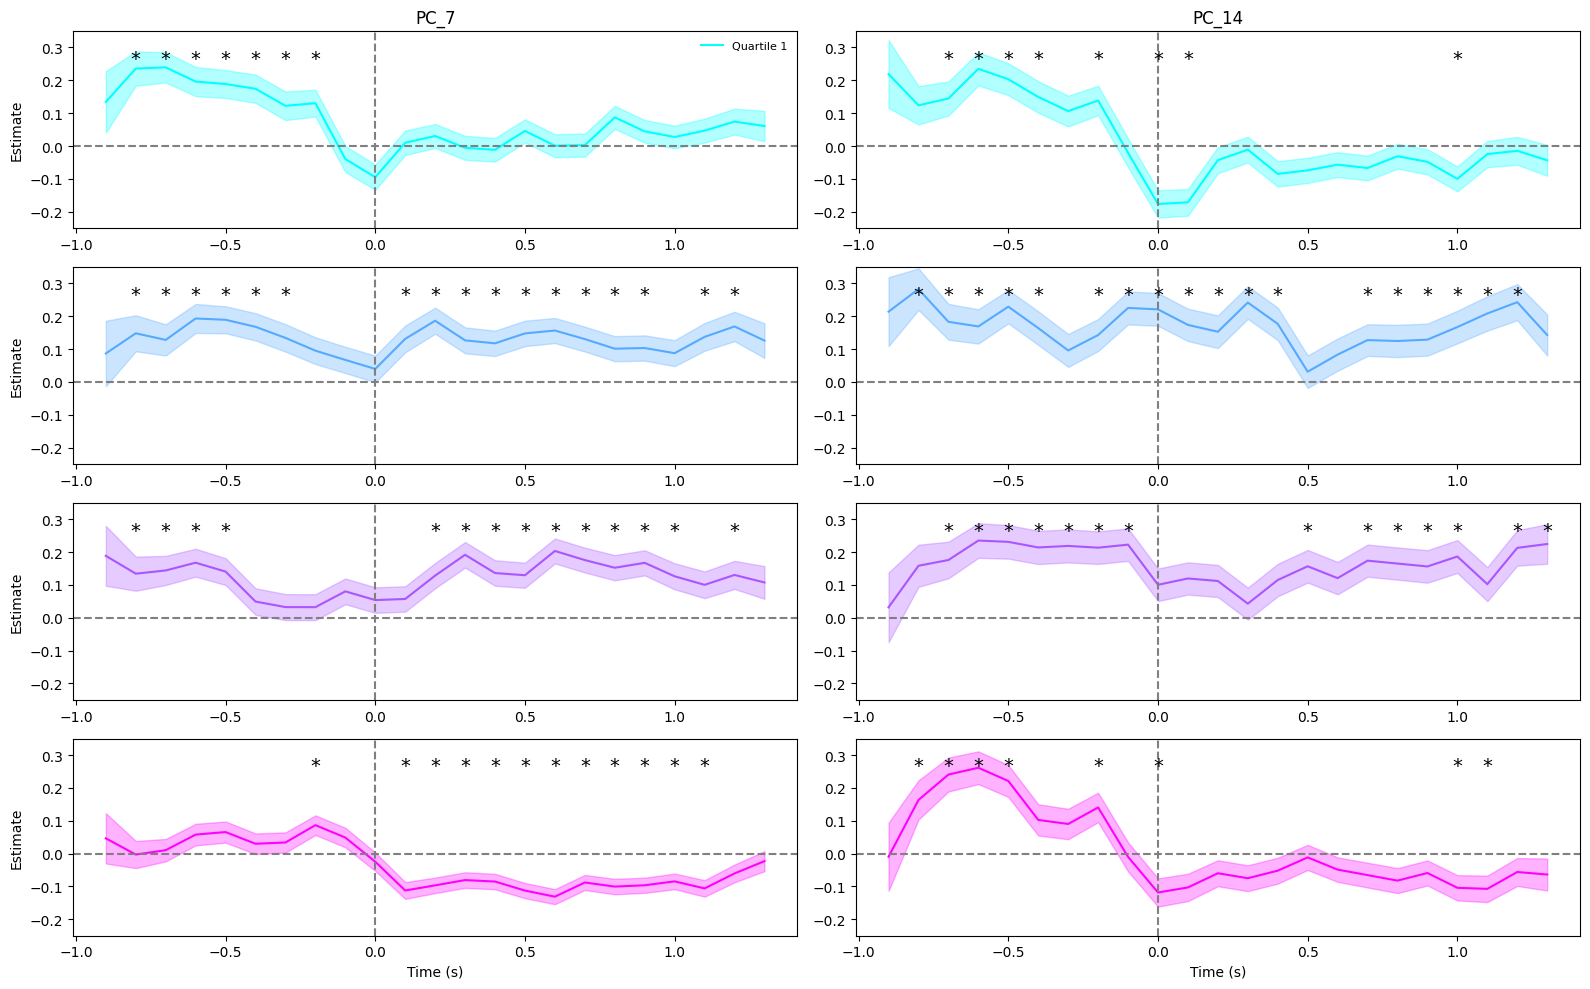

In [4]:
import warnings
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a dict with keys like "PC_7", etc., each containing a list of quartile waveforms

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define the PCs of interest
# pc_keys = ["PC_7", "PC_8", "PC_9", "PC_10"]
pc_keys = ["PC_7", "PC_14"]
# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Colors for quartiles

# Time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure for subplots
fig, axes = plt.subplots(nrows=4, ncols=len(pc_keys), figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for c, pc_key in enumerate(pc_keys):
    for q in range(4):
        main_effect_data = []

        # Loop through the time windows and compute main effects
        for i in range(len(window_start)):
            current_window_start = window_start[i]
            current_window_end = window_end[i]
            current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

            # Format window values for file naming
            w_start_str = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
            w_end_str = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
            if w_start_str == '-0': w_start_str = '0'
            if w_end_str == '-0': w_end_str = '0'

            # File path for the current quartile and time window
            file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{w_start_str}_{w_end_str}.csv'

            try:
                # Load data
                data = pd.read_csv(file_path)
                data = data[(data['block'] > 0) & (data['block'] < 7)]
                data['log_rt'] = np.log10(data['reach_rt'])
                data = data.reset_index(drop=True)
                data["subject"] = data["subject"].astype("category")
                data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

                # Fit linear mixed-effects model
                model = smf.mixedlm(
                    "reach_vis_abs_err ~ burst_count * group",
                    data,
                    groups=data["subject"]
                )
                model_fit = model.fit()

                # Extract results
                coef = model_fit.params
                stderr = model_fit.bse

                # Main effect (burst_count)
                main_effect_data.append({
                    "window": current_window_mid,
                    "Estimate": coef.get("burst_count", np.nan),
                    "SE": stderr.get("burst_count", np.nan),
                    "p_value": model_fit.pvalues.get("burst_count", np.nan),
                })

            except FileNotFoundError:
                # If file not found, just skip
                continue

        # Convert main effect data to DataFrame
        main_effect_df = pd.DataFrame(main_effect_data)

        # Plot Main Effect for this quartile and PC
        ax_main = axes[q, c]
        if not main_effect_df.empty:
            ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label=f"Quartile {q+1}" if c == 0 else None)
            ax_main.fill_between(
                main_effect_df["window"],
                main_effect_df["Estimate"] - main_effect_df["SE"],
                main_effect_df["Estimate"] + main_effect_df["SE"],
                alpha=0.3,
                color=col_r[q]
            )
            for _, row in main_effect_df.iterrows():
                if row["p_value"] < 0.05 / 4:
                    ax_main.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')

        ax_main.axvline(0, linestyle="--", color="grey")
        ax_main.axhline(0, linestyle="--", color="grey")
        ax_main.set_ylim(-0.25, 0.35)
        if q == 3:
            ax_main.set_xlabel("Time (s)")
        if c == 0:
            ax_main.set_ylabel("Estimate")
        if q == 0:
            ax_main.set_title(pc_key)

        # Add legend to the first column only, top subplot
        if q == 0 and c == 0:
            ax_main.legend(fontsize=8, frameon=False)

plt.tight_layout()
plt.show()


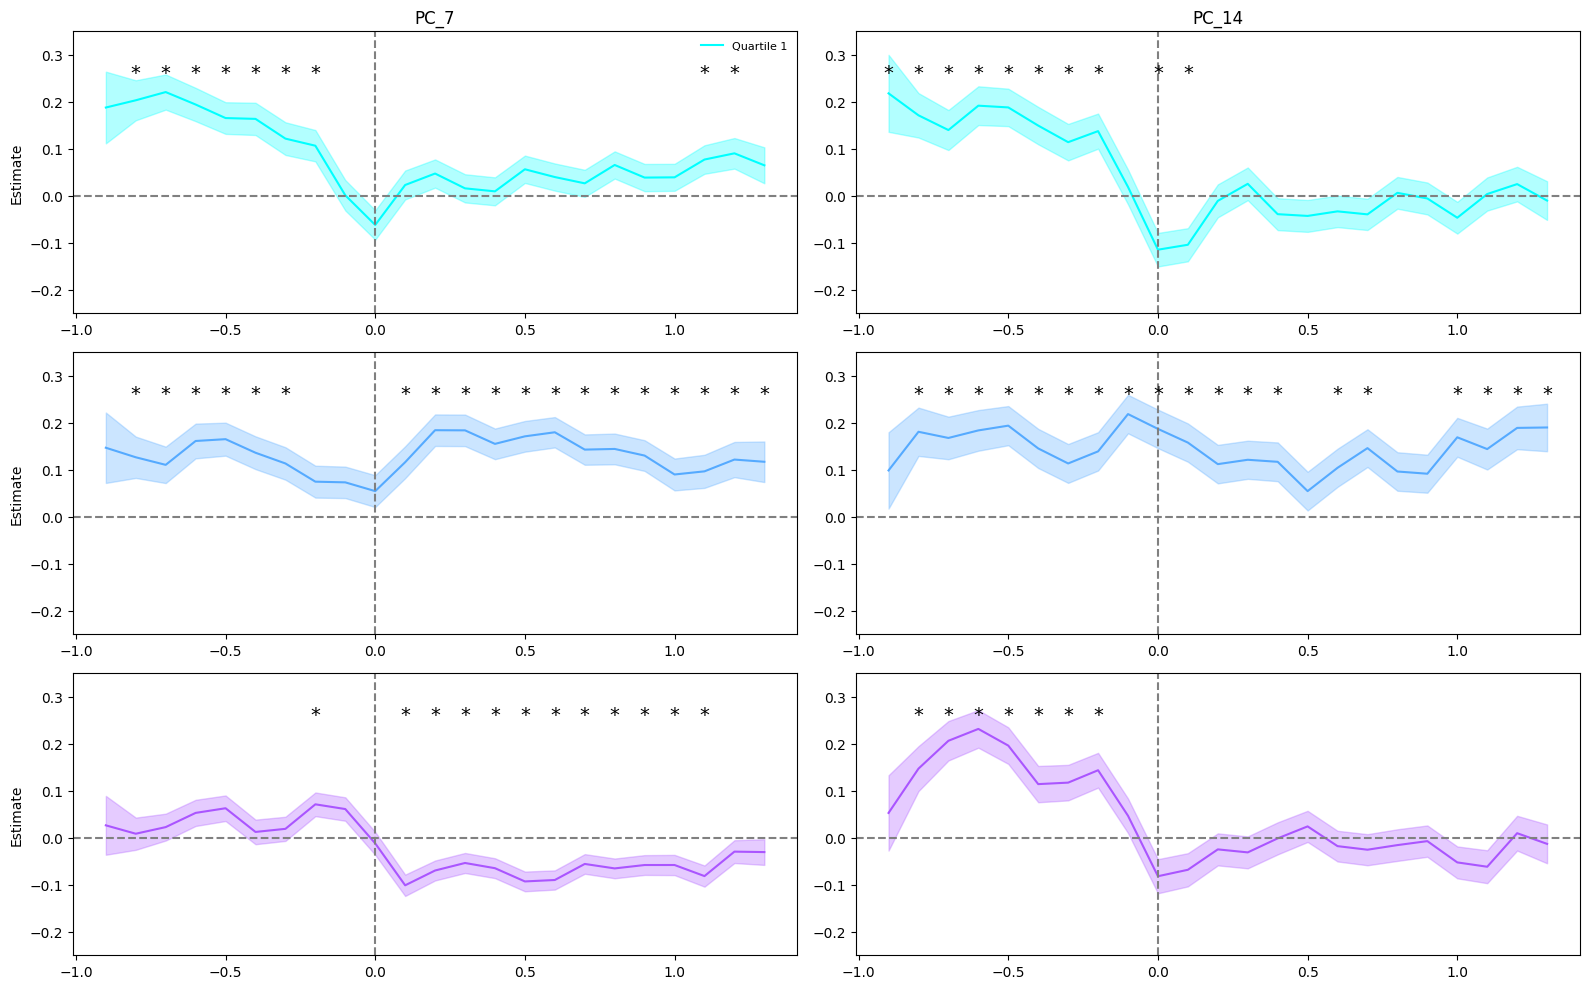

In [6]:
import warnings
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a dict with keys like "PC_7", etc., each containing a list of quartile waveforms

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define the PCs of interest
# pc_keys = ["PC_7", "PC_8", "PC_9", "PC_10"]
pc_keys = ["PC_7", "PC_14"]
# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Colors for quartiles

# Time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=len(pc_keys), figsize=(16, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for c, pc_key in enumerate(pc_keys):
    for q in range(3):
        main_effect_data = []

        # Loop through the time windows and compute main effects
        for i in range(len(window_start)):
            current_window_start = window_start[i]
            current_window_end = window_end[i]
            current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

            # Format window values for file naming
            w_start_str = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
            w_end_str = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
            if w_start_str == '-0': w_start_str = '0'
            if w_end_str == '-0': w_end_str = '0'

            # File path for the current quartile and time window
            file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL_ter/behav_df_T{q}_window_{w_start_str}_{w_end_str}.csv'

            try:
                # Load data
                data = pd.read_csv(file_path)
                data = data[(data['block'] > 0) & (data['block'] < 7)]
                data['log_rt'] = np.log10(data['reach_rt'])
                data = data.reset_index(drop=True)
                data["subject"] = data["subject"].astype("category")
                data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

                # Fit linear mixed-effects model
                model = smf.mixedlm(
                    "reach_vis_abs_err ~ burst_count * group",
                    data,
                    groups=data["subject"]
                )
                model_fit = model.fit()

                # Extract results
                coef = model_fit.params
                stderr = model_fit.bse

                # Main effect (burst_count)
                main_effect_data.append({
                    "window": current_window_mid,
                    "Estimate": coef.get("burst_count", np.nan),
                    "SE": stderr.get("burst_count", np.nan),
                    "p_value": model_fit.pvalues.get("burst_count", np.nan),
                })

            except FileNotFoundError:
                # If file not found, just skip
                continue

        # Convert main effect data to DataFrame
        main_effect_df = pd.DataFrame(main_effect_data)

        # Plot Main Effect for this quartile and PC
        ax_main = axes[q, c]
        if not main_effect_df.empty:
            ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label=f"Quartile {q+1}" if c == 0 else None)
            ax_main.fill_between(
                main_effect_df["window"],
                main_effect_df["Estimate"] - main_effect_df["SE"],
                main_effect_df["Estimate"] + main_effect_df["SE"],
                alpha=0.3,
                color=col_r[q]
            )
            for _, row in main_effect_df.iterrows():
                if row["p_value"] < 0.05 / 4:
                    ax_main.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')

        ax_main.axvline(0, linestyle="--", color="grey")
        ax_main.axhline(0, linestyle="--", color="grey")
        ax_main.set_ylim(-0.25, 0.35)
        if q == 3:
            ax_main.set_xlabel("Time (s)")
        if c == 0:
            ax_main.set_ylabel("Estimate")
        if q == 0:
            ax_main.set_title(pc_key)

        # Add legend to the first column only, top subplot
        if q == 0 and c == 0:
            ax_main.legend(fontsize=8, frameon=False)

plt.tight_layout()
plt.show()


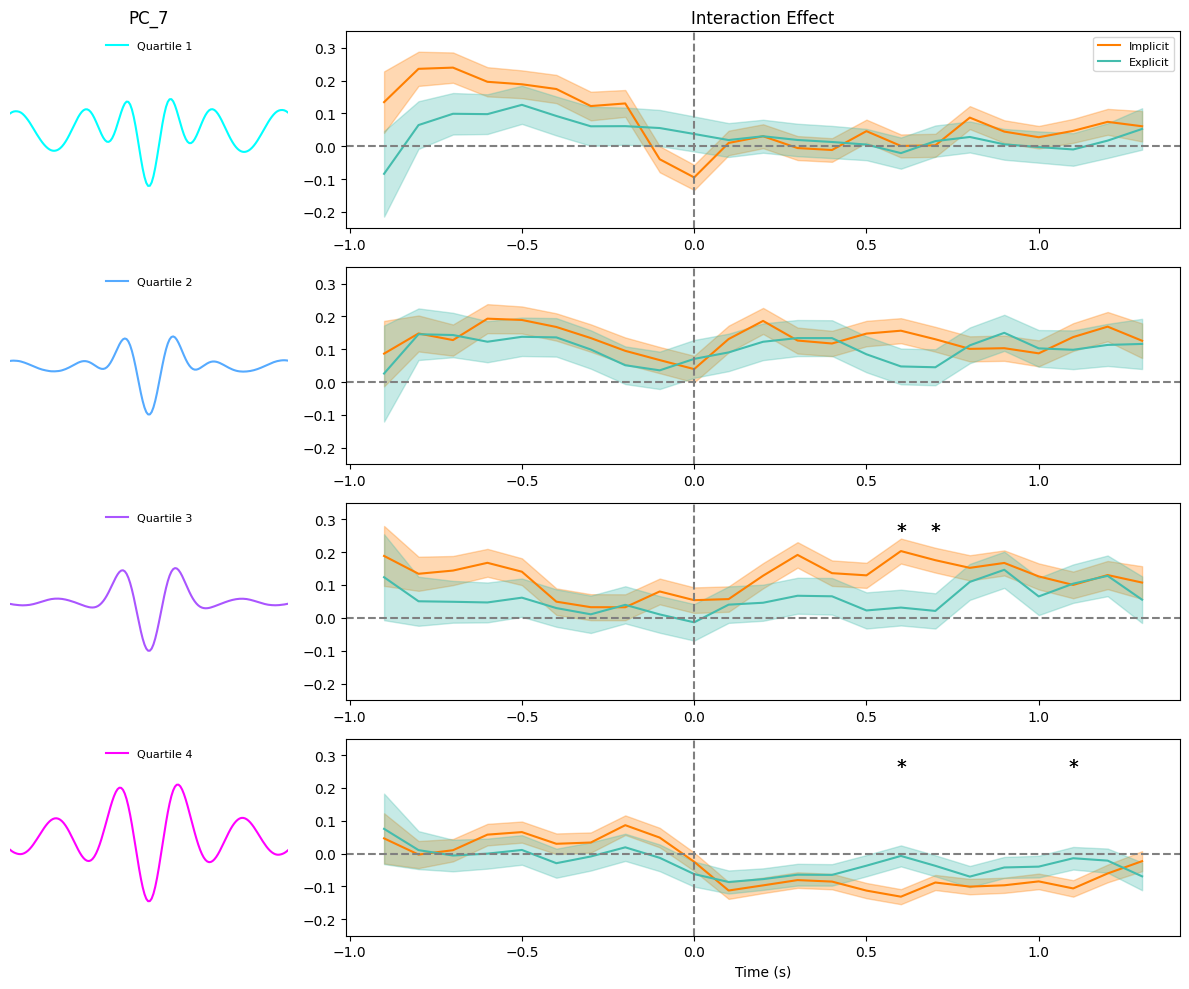

In [64]:
import warnings
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a dict of PCs, each with quartile data

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure with 4 rows and 2 columns (waveform, interaction)
fig, axes = plt.subplots(
    nrows=4, ncols=2, figsize=(12, 10),
    gridspec_kw={'width_ratios': [1, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles

# Loop through each quartile
for q in range(4):
    interaction_effect_data = []

    # Waveform plot (first column)
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key}" if q == 0 else "")

    # Analyze and plot interaction effects (second column)
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start_str = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end_str = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start_str == '-0': current_window_start_str = '0'
        if current_window_end_str == '-0': current_window_end_str = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start_str}_{current_window_end_str}.csv'
        
        try:
            # Load data
            data = pd.read_csv(file_path)
            data = data[(data['block'] > 0) & (data['block'] < 7)]
            data['log_rt'] = np.log10(data['reach_rt'])
            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            coef = model_fit.params
            stderr = model_fit.bse

            # Interaction effect p-value
            interaction_pval = model_fit.pvalues.get("burst_count:group[T.Implicit]", 1)
            significant = "*" if interaction_pval < 0.05 / 4 else ""

            # For Implicit
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": significant
            })

            # For Explicit
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": significant
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrame
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Interaction Effect (second column)
    ax_interaction = axes[q, 1]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.35)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

plt.tight_layout()
plt.show()


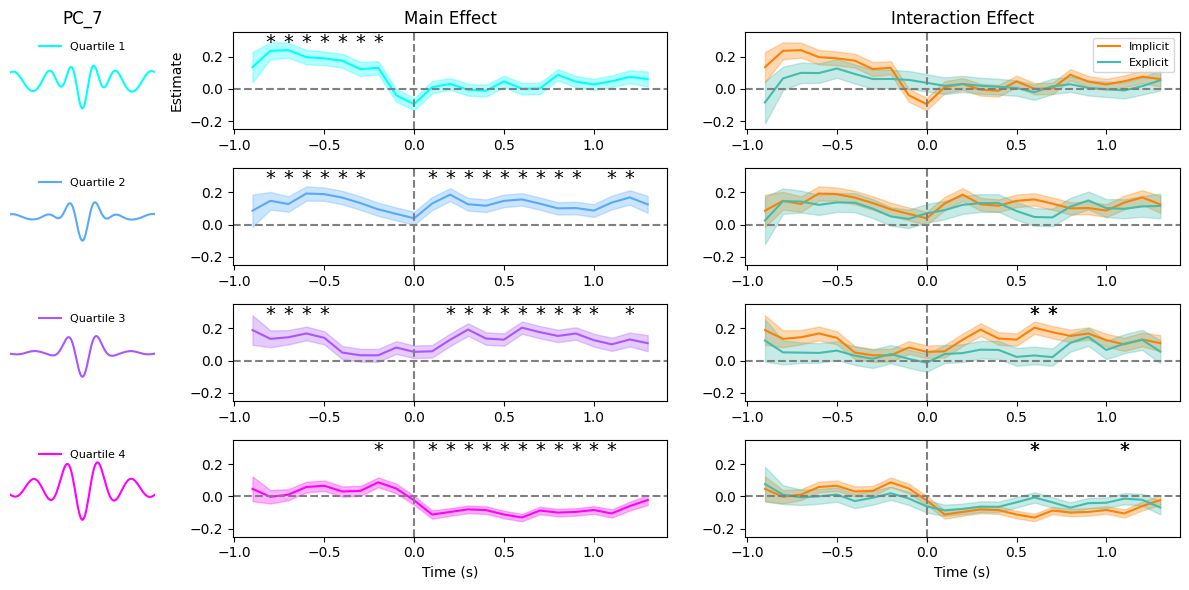

In [40]:
warnings.filterwarnings("ignore")


# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a list of precomputed waveforms for each quartile

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure for subplots with adjusted widths
fig, axes = plt.subplots(
    nrows=4, ncols=3, figsize=(12, 6),
    gridspec_kw={'width_ratios': [1, 3, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each quartile
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles
for q in range(4):
    main_effect_data = []
    interaction_effect_data = []

    # Generate waveform plot for the current quartile
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key}" if q == 0 else "")

    # Analyze and plot main and interaction effects
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start == '-0': current_window_start = '0'
        if current_window_end == '-0': current_window_end = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start}_{current_window_end}.csv'
        

        try:
            # Load data
            data = pd.read_csv(file_path)
            data = data[(data['block'] > 0) & (data['block'] < 7)]
            data['log_rt'] = np.log10(data['reach_rt'])

            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            # Extract results
            coef = model_fit.params
            stderr = model_fit.bse

            # Main effect
            main_effect_data.append({
                "window": current_window_mid,
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "p_value": model_fit.pvalues.get("burst_count", np.nan),
            })

            # Interaction effect
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrames
    main_effect_df = pd.DataFrame(main_effect_data)
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Main Effect
    ax_main = axes[q, 1]
    ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label="Main Effect" if q == 0 else None)
    ax_main.fill_between(
        main_effect_df["window"],
        main_effect_df["Estimate"] - main_effect_df["SE"],
        main_effect_df["Estimate"] + main_effect_df["SE"],
        alpha=0.3,
        color=col_r[q]
    )
    for _, row in main_effect_df.iterrows():
        if row["p_value"] < 0.05 / 4:
            ax_main.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_main.axvline(0, linestyle="--", color="grey")
    ax_main.axhline(0, linestyle="--", color="grey")
    ax_main.set_title("Main Effect" if q == 0 else "")
    ax_main.set_ylim(-0.25, 0.35)
    ax_main.set_xlabel("Time (s)" if q == 3 else "")
    ax_main.set_ylabel("Estimate" if q == 0 else "")

    # Plot Interaction Effect
    ax_interaction = axes[q, 2]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.35)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

# Display all plots
plt.tight_layout()
plt.show()


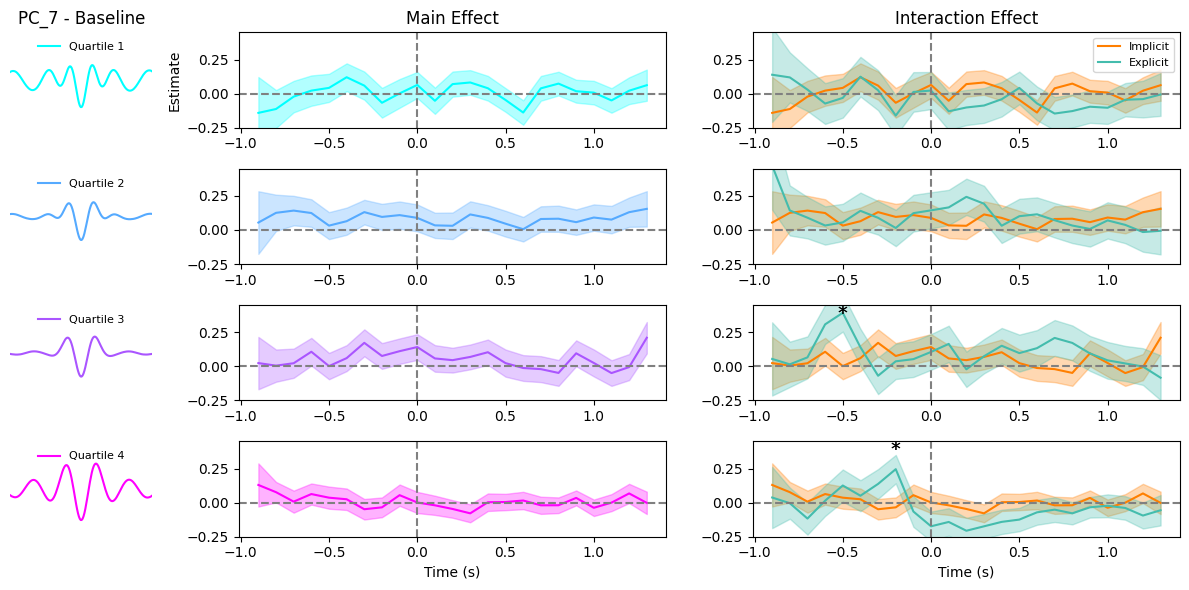

In [42]:
warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a list of precomputed waveforms for each quartile

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure for subplots with adjusted widths
fig, axes = plt.subplots(
    nrows=4, ncols=3, figsize=(12, 6),
    gridspec_kw={'width_ratios': [1, 3, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each quartile
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles
for q in range(4):
    main_effect_data = []
    interaction_effect_data = []

    # Generate waveform plot for the current quartile
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key} - Baseline" if q == 0 else "")

    # Analyze and plot main and interaction effects
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start == '-0': current_window_start = '0'
        if current_window_end == '-0': current_window_end = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start}_{current_window_end}.csv'

        try:
            # Load data
            data = pd.read_csv(file_path)
            data = data[(data['block'] == 0)]
            data['log_rt'] = np.log10(data['reach_rt'])

            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            # Extract results
            coef = model_fit.params
            stderr = model_fit.bse

            # Main effect
            main_effect_data.append({
                "window": current_window_mid,
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "p_value": model_fit.pvalues.get("burst_count", np.nan),
            })

            # Interaction effect
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrames
    main_effect_df = pd.DataFrame(main_effect_data)
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Main Effect
    ax_main = axes[q, 1]
    ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label="Main Effect" if q == 0 else None)
    ax_main.fill_between(
        main_effect_df["window"],
        main_effect_df["Estimate"] - main_effect_df["SE"],
        main_effect_df["Estimate"] + main_effect_df["SE"],
        alpha=0.3,
        color=col_r[q]
    )
    for _, row in main_effect_df.iterrows():
        if row["p_value"] < 0.05 / 4:
            ax_main.text(row["window"], 0.35, "*", color="black", fontsize=14, ha='center')
    ax_main.axvline(0, linestyle="--", color="grey")
    ax_main.axhline(0, linestyle="--", color="grey")
    ax_main.set_title("Main Effect" if q == 0 else "")
    ax_main.set_ylim(-0.25, 0.45)
    ax_main.set_xlabel("Time (s)" if q == 3 else "")
    ax_main.set_ylabel("Estimate" if q == 0 else "")

    # Plot Interaction Effect
    ax_interaction = axes[q, 2]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.35, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.45)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

# Display all plots
plt.tight_layout()
plt.show()


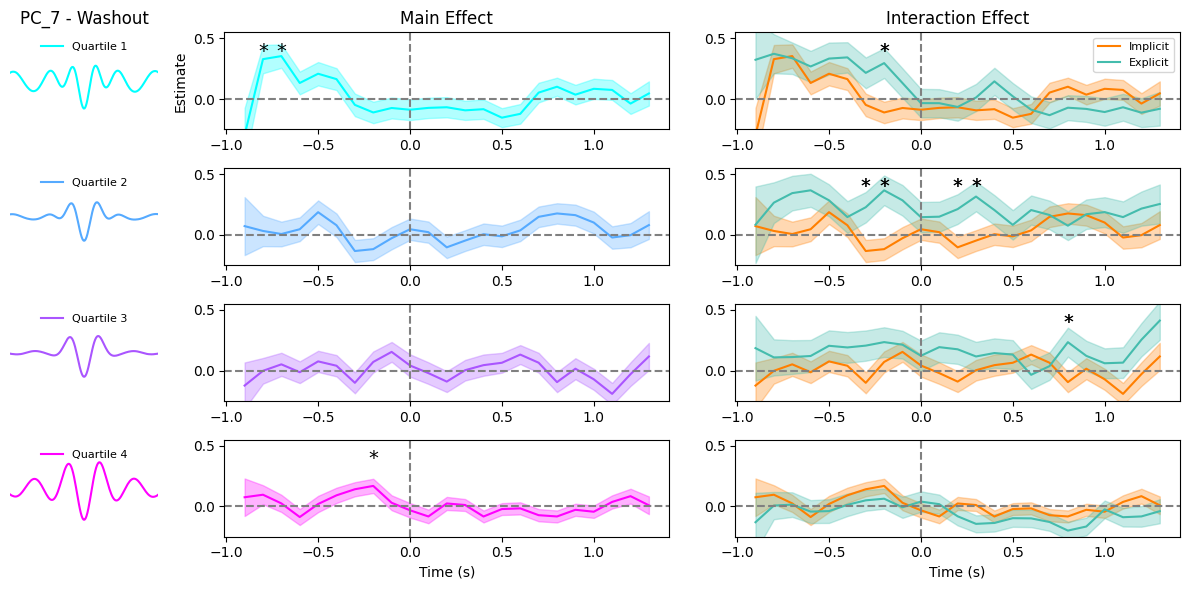

In [45]:
warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a list of precomputed waveforms for each quartile

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end, step)
window_end = np.arange(start_2, end_2, step)

# Prepare figure for subplots with adjusted widths
fig, axes = plt.subplots(
    nrows=4, ncols=3, figsize=(12, 6),
    gridspec_kw={'width_ratios': [1, 3, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each quartile
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles
for q in range(4):
    main_effect_data = []
    interaction_effect_data = []

    # Generate waveform plot for the current quartile
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key} - Washout" if q == 0 else "")

    # Analyze and plot main and interaction effects
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start == '-0': current_window_start = '0'
        if current_window_end == '-0': current_window_end = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start}_{current_window_end}.csv'

        try:
            # Load data
            data = pd.read_csv(file_path)
            data = data[(data['block'] == 7)]
            data['log_rt'] = np.log10(data['reach_rt'])

            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            # Extract results
            coef = model_fit.params
            stderr = model_fit.bse

            # Main effect
            main_effect_data.append({
                "window": current_window_mid,
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "p_value": model_fit.pvalues.get("burst_count", np.nan),
            })

            # Interaction effect
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrames
    main_effect_df = pd.DataFrame(main_effect_data)
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Main Effect
    ax_main = axes[q, 1]
    ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label="Main Effect" if q == 0 else None)
    ax_main.fill_between(
        main_effect_df["window"],
        main_effect_df["Estimate"] - main_effect_df["SE"],
        main_effect_df["Estimate"] + main_effect_df["SE"],
        alpha=0.3,
        color=col_r[q]
    )
    for _, row in main_effect_df.iterrows():
        if row["p_value"] < 0.05 / 4:
            ax_main.text(row["window"], 0.35, "*", color="black", fontsize=14, ha='center')
    ax_main.axvline(0, linestyle="--", color="grey")
    ax_main.axhline(0, linestyle="--", color="grey")
    ax_main.set_title("Main Effect" if q == 0 else "")
    ax_main.set_ylim(-0.25, 0.55)
    ax_main.set_xlabel("Time (s)" if q == 3 else "")
    ax_main.set_ylabel("Estimate" if q == 0 else "")

    # Plot Interaction Effect
    ax_interaction = axes[q, 2]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.35, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.55)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

# Display all plots
plt.tight_layout()
plt.show()


File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q0_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q1_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q2_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q3_window_1.4_1.6.csv


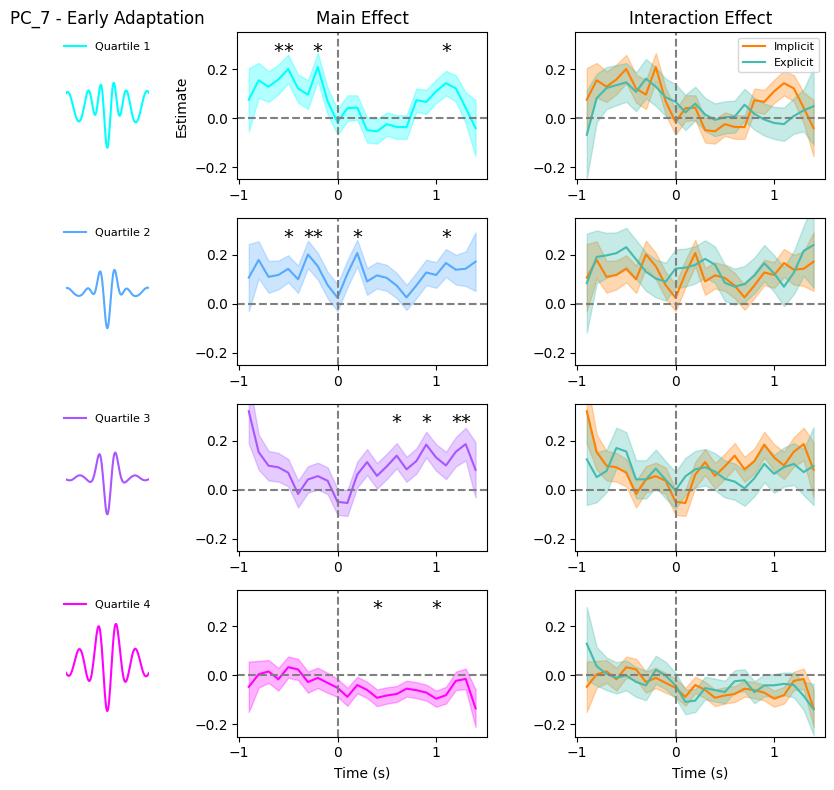

In [6]:
warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a list of precomputed waveforms for each quartile

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end + step, step)
window_end = np.arange(start_2, end_2 + step, step)

# Prepare figure for subplots with adjusted widths
fig, axes = plt.subplots(
    nrows=4, ncols=3, figsize=(8, 8),
    gridspec_kw={'width_ratios': [1, 3, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each quartile
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles
for q in range(4):
    main_effect_data = []
    interaction_effect_data = []

    # Generate waveform plot for the current quartile
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key} - Early Adaptation" if q == 0 else "")

    # Analyze and plot main and interaction effects
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start == '-0': current_window_start = '0'
        if current_window_end == '-0': current_window_end = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start}_{current_window_end}.csv'

        try:
            # Load data
            data = pd.read_csv(file_path)
            # pick data from block 1 to 3
            data = data[(data['block'] > 0) & (data['block'] < 4)]
            data['log_rt'] = np.log10(data['reach_rt'])

            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            # Extract results
            coef = model_fit.params
            stderr = model_fit.bse

            # Main effect
            main_effect_data.append({
                "window": current_window_mid,
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "p_value": model_fit.pvalues.get("burst_count", np.nan),
            })

            # Interaction effect
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrames
    main_effect_df = pd.DataFrame(main_effect_data)
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Main Effect
    ax_main = axes[q, 1]
    ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label="Main Effect" if q == 0 else None)
    ax_main.fill_between(
        main_effect_df["window"],
        main_effect_df["Estimate"] - main_effect_df["SE"],
        main_effect_df["Estimate"] + main_effect_df["SE"],
        alpha=0.3,
        color=col_r[q]
    )
    for _, row in main_effect_df.iterrows():
        if row["p_value"] < 0.05 / 4:
            ax_main.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_main.axvline(0, linestyle="--", color="grey")
    ax_main.axhline(0, linestyle="--", color="grey")
    ax_main.set_title("Main Effect" if q == 0 else "")
    ax_main.set_ylim(-0.25, 0.35)
    ax_main.set_xlabel("Time (s)" if q == 3 else "")
    ax_main.set_ylabel("Estimate" if q == 0 else "")

    # Plot Interaction Effect
    ax_interaction = axes[q, 2]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.35)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

# Display all plots
plt.tight_layout()
plt.show()


File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q0_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q1_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q2_window_1.4_1.6.csv
File not found: C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/PC_7_Motor_BL/behav_df_Q3_window_1.4_1.6.csv


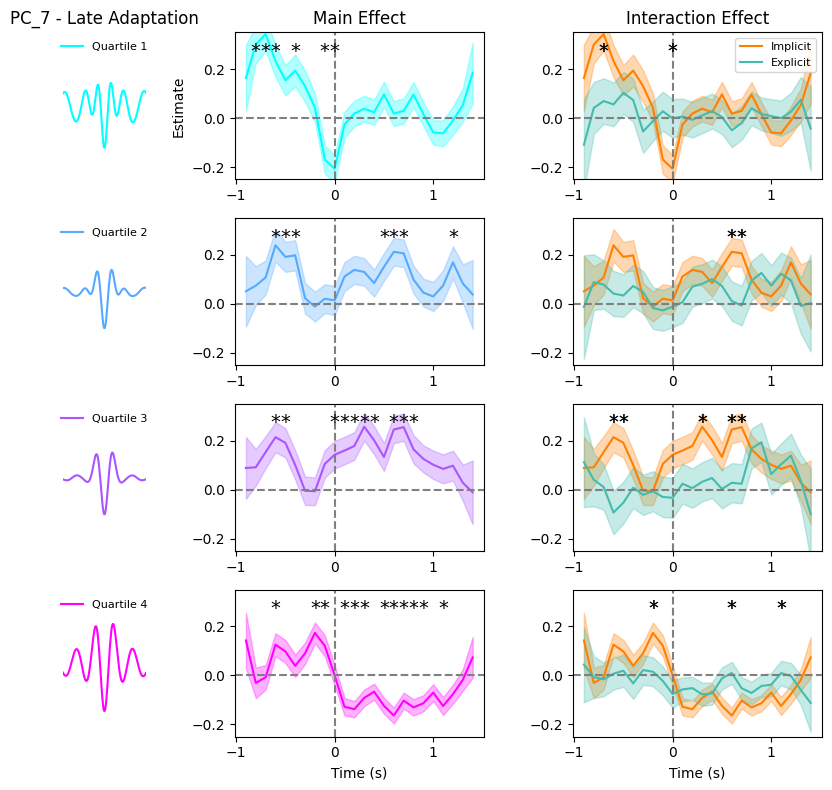

In [7]:
warnings.filterwarnings("ignore")

# File paths to precomputed waveform data
waveform_file_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\processed_waveforms.pkl"
waveform_time_path = r"C:\Users\qmoreau\Documents\Work\Beta_bursts\Burst_files\waveform_time.npy"

# Load precomputed waveform data
with open(waveform_file_path, "rb") as f:
    wvfrms = pickle.load(f)  # wvfrms should be a list of precomputed waveforms for each quartile

waveform_time = np.load(waveform_time_path)  # Time array for the waveforms

# Define PC key
pc_key = "PC_7"

# Define color palettes
adapt1 = sns.color_palette("Set1", n_colors=9)
colors1 = sns.color_palette("mako_r", n_colors=10)
colorbl = [adapt1[4], colors1[2]]

# Initialize variables for time windows
start, end, step = -1, 1.3, 0.1
start_2, end_2 = -0.8, 1.5
window_start = np.arange(start, end + step, step)
window_end = np.arange(start_2, end_2 + step, step)

# Prepare figure for subplots with adjusted widths
fig, axes = plt.subplots(
    nrows=4, ncols=3, figsize=(8, 8),
    gridspec_kw={'width_ratios': [1, 3, 3]}
)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each quartile
col_r = plt.cm.cool(np.linspace(0, 1, num=4))  # Generate consistent colors for quartiles
for q in range(4):
    main_effect_data = []
    interaction_effect_data = []

    # Generate waveform plot for the current quartile
    ax_waveform = axes[q, 0]
    ax_waveform.set_ylim(-16, 16)
    ax_waveform.set_xlim(-0.13, 0.13)
    for spine in ax_waveform.spines.values():
        spine.set_visible(False)
    ax_waveform.set_yticks([])
    ax_waveform.set_xticks([])
    ax_waveform.plot(waveform_time, wvfrms[pc_key][q] * 1e14, color=col_r[q], label=f"Quartile {q+1}")
    ax_waveform.legend(loc="upper center", frameon=False, fontsize=8)
    ax_waveform.set_title(f"{pc_key} - Late Adaptation" if q == 0 else "")

    # Analyze and plot main and interaction effects
    for i in range(len(window_start)):
        current_window_start = window_start[i]
        current_window_end = window_end[i]
        current_window_mid = current_window_start + 0.5 * (current_window_end - current_window_start)

        # Format window values for file naming
        current_window_start = f"{current_window_start:.3f}".rstrip('0').rstrip('.')
        current_window_end = f"{current_window_end:.3f}".rstrip('0').rstrip('.')
        if current_window_start == '-0': current_window_start = '0'
        if current_window_end == '-0': current_window_end = '0'

        # File path for the current quartile and time window
        file_path = f'C:/Users/qmoreau/Documents/Work/Beta_bursts/Bursts/Motor_PCs_baseline/{pc_key}_Motor_BL/behav_df_Q{q}_window_{current_window_start}_{current_window_end}.csv'

        try:
            # Load data
            data = pd.read_csv(file_path)
            # pick data from block 4 to 6
            data = data[(data['block'] > 3) & (data['block'] < 7)]
            data['log_rt'] = np.log10(data['reach_rt'])

            data = data.reset_index(drop=True)
            data["subject"] = data["subject"].astype("category")
            data = data.dropna(subset=["reach_vis_abs_err", "burst_count", "group", "subject"])

            # Fit linear mixed-effects model
            model = smf.mixedlm(
                "reach_vis_abs_err ~ burst_count * group",
                data,
                groups=data["subject"]
            )
            model_fit = model.fit()

            # Extract results
            coef = model_fit.params
            stderr = model_fit.bse

            # Main effect
            main_effect_data.append({
                "window": current_window_mid,
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "p_value": model_fit.pvalues.get("burst_count", np.nan),
            })

            # Interaction effect
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Implicit",
                "Estimate": coef.get("burst_count", np.nan),
                "SE": stderr.get("burst_count", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })
            interaction_effect_data.append({
                "window": current_window_mid,
                "group": "Explicit",
                "Estimate": coef.get("burst_count", np.nan) + coef.get("burst_count:group[T.Implicit]", 0),
                "SE": stderr.get("burst_count:group[T.Implicit]", np.nan),
                "annotate": "*" if model_fit.pvalues.get("burst_count:group[T.Implicit]", 1) < 0.05 / 4 else ""
            })

        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Convert to DataFrames
    main_effect_df = pd.DataFrame(main_effect_data)
    interaction_effect_df = pd.DataFrame(interaction_effect_data)

    # Plot Main Effect
    ax_main = axes[q, 1]
    ax_main.plot(main_effect_df["window"], main_effect_df["Estimate"], color=col_r[q], label="Main Effect" if q == 0 else None)
    ax_main.fill_between(
        main_effect_df["window"],
        main_effect_df["Estimate"] - main_effect_df["SE"],
        main_effect_df["Estimate"] + main_effect_df["SE"],
        alpha=0.3,
        color=col_r[q]
    )
    for _, row in main_effect_df.iterrows():
        if row["p_value"] < 0.05 / 4:
            ax_main.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_main.axvline(0, linestyle="--", color="grey")
    ax_main.axhline(0, linestyle="--", color="grey")
    ax_main.set_title("Main Effect" if q == 0 else "")
    ax_main.set_ylim(-0.25, 0.35)
    ax_main.set_xlabel("Time (s)" if q == 3 else "")
    ax_main.set_ylabel("Estimate" if q == 0 else "")

    # Plot Interaction Effect
    ax_interaction = axes[q, 2]
    for i, group in enumerate(interaction_effect_df["group"].unique()):
        group_df = interaction_effect_df[interaction_effect_df["group"] == group]
        ax_interaction.plot(group_df["window"], group_df["Estimate"], color=colorbl[i], label=group if q == 0 else None)
        ax_interaction.fill_between(
            group_df["window"],
            group_df["Estimate"] - group_df["SE"],
            group_df["Estimate"] + group_df["SE"],
            alpha=0.3,
            color=colorbl[i]
        )
        for _, row in group_df.iterrows():
            if row["annotate"] == "*":
                ax_interaction.text(row["window"], 0.25, "*", color="black", fontsize=14, ha='center')
    ax_interaction.axvline(0, linestyle="--", color="grey")
    ax_interaction.axhline(0, linestyle="--", color="grey")
    ax_interaction.set_ylim(-0.25, 0.35)
    ax_interaction.set_title("Interaction Effect" if q == 0 else "")
    ax_interaction.set_xlabel("Time (s)" if q == 3 else "")
    if q == 0:
        ax_interaction.legend(fontsize=8, title_fontsize=8)

# Display all plots
plt.tight_layout()
plt.show()
